<a href="https://colab.research.google.com/github/prakanshuls22/MachineL_IBM/blob/master/GitCollabNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install PyGithub
from github import Github

In [ ]:
g=Github("451afd7abd19f882f4861f93799c21520fa08510")
g.get_user().get_repos()

In [ ]:
for repo in g.get_user().get_repos():
    print(repo.name)
    repo.edit(has_wiki=False)
    # to see all the available attributes and methods
    print(dir(repo))

Coursera_Capstone
['CHECK_AFTER_INIT_FLAG', '_CompletableGithubObject__complete', '_CompletableGithubObject__completed', '_GithubObject__makeSimpleAttribute', '_GithubObject__makeSimpleListAttribute', '_GithubObject__makeTransformedAttribute', '_Repository__create_pull', '_Repository__create_pull_1', '_Repository__create_pull_2', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_allow_merge_commit', '_allow_rebase_merge', '_allow_squash_merge', '_archive_url', '_archived', '_assignees_url', '_blobs_url', '_branches_url', '_clone_url', '_collaborators_url', '_comments_url', '_commits_url', '_compare_url', '_completeIfNeeded', '_completeIfNotSet', '_contents_url', '_contributors_url', '_created_at

KeyboardInterrupt: ignored

### Loading the repository data

In [ ]:
import pandas as pd
df=pd.read_json("/content/datainjson800repos2.txt",lines=True)
df

In [ ]:
repo_names=[]
for i in range(100):
  repo_names.append(df["full_name"].iloc[i])
repo_names

In [ ]:
import time
repositories=g.search_repositories(query="language:python")

In [ ]:
for repo in repositories:
  print(repo)

In [ ]:
print(repositories[2].raw_data)

## Data Collector Method for collecting repository data

In [ ]:
import datetime
def datacollecter1(repo):
  #repo=g.get_repo(query)
  contributors_data=[]
  print(1)
  contributors=repo.get_contributors(anon=0)
  for contributor in contributors:
    contributors_data.append(contributor.login)
  
  
  starcount=repo.stargazers_count
  forkcount=repo.forks_count

  print(2)
  last_year_commits=repo.get_stats_commit_activity()
  last_year_commits_l=[]
  for commit in last_year_commits:
    last_year_commits_l.append(commit.raw_data)
  topics=repo.get_topics()
  pulls=repo.get_pulls("all")
  count=0
  temp_pulls=[]
  print(3)
  for pull in pulls:
    temp_pulls.append({"Number":pulls[count].number,"State":pulls[count].state,"Opened_by":pulls[count].user.login,"Merged":pulls[count].merged,"Merged_by":pulls[count].merged_by,"Merged_at":pulls[count].merged_at})
    count=count+1
  print(4)
  participation_all=repo.get_stats_participation().all
  participation_owner=repo.get_stats_participation().owner
  
  last_updated=repo.updated_at
  open_issues=repo.open_issues


  issues=repositories[2].get_issues(state="all",since=datetime.datetime(2020, 7, 1))
  #issues[0].raw_data
  count=0
  issue_list=[]
  for issue in issues:
    issue_list.append({"number":issue.number,"created_at":issue.created_at,"state":issue.state,"closed_at":issue.closed_at,"closed_by":issue.closed_by,"opened_by":issue.user.login})
  ##Note this is grouped by week and .total .days and .week can be used its grouped by week
  print(5)
  mydfl=[datetime.datetime.now(),repo.full_name,contributors_data,starcount,last_year_commits_l,topics,temp_pulls,participation_all,participation_owner,last_updated,open_issues,issue_list]
  return mydfl

In [ ]:
import pandas as pd


In [ ]:
mydf=pd.DataFrame(columns=["TimeStamp","Repo Name","Contributors_data","starcount","Commit History","topics","Pull history","Participation All","Participation Owner","Last updated","Open Issues","Issue History"])



In [ ]:
count = 0
for i in range(10):
  mydfl=datacollecter1(repositories[i])
  a_series = pd.Series(mydfl, index = mydf.columns)
  mydf = mydf.append(a_series, ignore_index=True)  
mydf

In [ ]:
import datetime
def datacollecter2(repo):
  #repo=g.get_repo(query)
  contributors_data=[]
  
  contributors=repo.get_contributors(anon=0)
  for contributor in contributors:
    contributors_data.append(contributor.login)
  
  
  starcount=repo.stargazers_count
  forkcount=repo.forks_count

  
  topics=repo.get_topics()
  participation_all=repo.get_stats_participation().all
  participation_owner=repo.get_stats_participation().owner
  
  last_updated=repo.updated_at
  open_issues=repo.open_issues
  owner=repo.owner
  organization = repo.organization
  language=repo.language
  created_at=repo.created_at
  #issues[0].raw_data
  count=0
  ##Note this is grouped by week and .total .days and .week can be used its grouped by week
  
  mydfl=[datetime.datetime.now(),repo.full_name,contributors_data,starcount,topics,participation_all,participation_owner,last_updated,open_issues,organization,language,owner,created_at]
  return mydfl

In [ ]:
mydf=pd.DataFrame(columns=["TimeStamp","Repo Name","Contributors_data","starcount","topics","Participation All","Participation Owner","Last updated","Open Issues","Organization","Language","Owner","created at"])
print(g.get_rate_limit())
count=0
for i in range(len(biglist)):
  mydfl = datacollecter2(biglist[i])
  a_series = pd.Series(mydfl, index = mydf.columns)
  mydf = mydf.append(a_series, ignore_index=True) 
  count=count+1
  print(count) 
print(g.get_rate_limit())
mydf

RateLimit(core=Rate(reset=2020-10-15 19:07:23, remaining=4516, limit=5000))
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
RateLimit(core=Rate(reset=2020-10-15 19:07:23, remaining=4402, limit=5000))


,TimeStamp,Repo Name,Contributors_data,starcount,topics,Participation All,Participation Owner,Last updated,Open Issues,Organization,Language,Owner,created at
0,2020-10-15 18:19:01.892650,jashkenas/backbone,"[jashkenas, braddunbar, akre54, jridgewell, ca...",27680,[],"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",2020-10-15 13:37:06,95,None,JavaScript,"NamedUser(login=""jashkenas"")",2010-09-30 19:41:28
1,2020-10-15 18:19:03.197253,wireservice/agate-lookup,"[onyxfish, jpmckinney, thejefflarson, pmlandwehr]",2,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-08-21 03:24:52,0,"Organization(login=""wireservice"")",Python,"NamedUser(login=""wireservice"")",2016-02-06 05:10:10
2,2020-10-15 18:19:04.398255,dangra/anemone-spider,"[dangra, vshlapakov]",0,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2016-09-16 15:27:52,0,None,Ruby,"NamedUser(login=""dangra"")",2014-03-11 12:34:19
3,2020-10-15 18:19:06.171080,acornjs/acorn-jsx,"[marijnh, RReverser, aparajita, max-schaefer, ...",480,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-10-08 05:42:48,11,"Organization(login=""acornjs"")",JavaScript,"NamedUser(login=""acornjs"")",2014-07-23 23:53:35
4,2020-10-15 18:19:07.407232,railscasts/221-subdomains-in-rails-3,[gilesbowkett],2,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2014-04-17 01:52:44,1,"Organization(login=""railscasts"")",Ruby,"NamedUser(login=""railscasts"")",2011-07-29 22:01:48
5,2020-10-15 18:19:08.532113,marijnh/acl-zmq,[marijnh],1,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2017-09-11 15:19:20,0,None,Common Lisp,"NamedUser(login=""marijnh"")",2010-11-02 10:58:41
6,2020-10-15 18:19:09.774243,conda-forge/agate-feedstock,"[pmlandwehr, beckermr, conda-forge-admin]",1,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-08-07 18:10:57,1,"Organization(login=""conda-forge"")",Shell,"NamedUser(login=""conda-forge"")",2017-02-05 20:16:09
7,2020-10-15 18:19:11.655416,elastic/apm-agent-nodejs,"[watson, Qard, mattrobenolt, v1v, bmorelli25, ...",442,"[apm, performance-monitoring, error-monitoring...","[1, 7, 7, 1, 14, 2, 3, 3, 4, 0, 0, 3, 2, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-10-14 17:56:56,183,"Organization(login=""elastic"")",JavaScript,"NamedUser(login=""elastic"")",2017-08-08 09:07:27
8,2020-10-15 18:19:12.872530,conda-forge/addict-feedstock,"[Ohjeah, ocefpaf, regro-cf-autotick-bot, conda...",0,[],"[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-10-11 11:21:11,0,"Organization(login=""conda-forge"")",None,"NamedUser(login=""conda-forge"")",2016-07-21 04:44:06
9,2020-10-15 18:19:14.040358,Ohjeah/abrupt-sindy,[Ohjeah],0,[],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2020-04-23 14:27:16,0,None,Jupyter Notebook,"NamedUser(login=""Ohjeah"")",2019-11-18 08:37:32


In [ ]:
import pandas as pd
mydf.to_csv("sampledata_walk15Oct.csv")


In [ ]:
cont_list=list(mydf["Contributors_data"])

In [ ]:
flat_list = []
for sublist in cont_list:
    for item in sublist:
        flat_list.append(item)
elements_count = {}
# iterating over the elements for frequency
for element in flat_list:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
count=0
sum=0
for key, value in elements_count.items():
    if value == 1:
      pass
    elif value >= 3:
      count=count+1
      sum=sum+value
      print(f"{key}: {value}")
print(sum-count)

thejefflarson: 3
jdalton: 3
fitzgen: 3
prust: 3
prayagverma: 3
ReadmeCritic: 4
dependabot[bot]: 4
onyxfish: 3
marijnh: 3
aparajita: 4
max-schaefer: 4
mrcarlberg: 3
kaicataldo: 3
Rich-Harris: 3
RichardLitt: 4
beckermr: 3
eventualbuddha: 3
39


In [ ]:
created_atl=df["created_at"]
mydf["Created_At"]=created_atl

In [ ]:
print(g.get_rate_limit())
contributor_statsl=[]
full_contributor_data=[]
for i in range(702):
  print(mydf.iloc[i]["Repo Name"])
  repo=g.get_repo(mydf.iloc[i]["Repo Name"])
  stats=repo.get_stats_contributors()
  temp=[]
  if stats != None:
    for stat in stats:
      login=stat.author.login
      total=stat.total
      weeks=stat.weeks
      weekl=[]
      for week in weeks:
        weekl.append(week.raw_data)
      temp.append([login,total,weekl])
  contributor_statsl.append(temp)

In [ ]:
len_list=[]
for i in range(702):
  len_list.append(len(contributor_statsl[i]))
print(max(len_list))

In [ ]:
mydf["Contributor Statistics"]=contributor_statsl

In [ ]:
print(g.get_rate_limit())
mydf
mydf.to_csv("sampledata3.csv")

In [ ]:
mydf.to_csv("sample.csv")
mydf.head()

In [ ]:
#mydfl=datacollecter1(repositories[0])
mydf2=pd.read_csv("sample.csv")
mydf2

In [ ]:
a_series = pd.Series(mydfl, index = mydf.columns)
mydf = mydf.append(a_series, ignore_index=True)

In [ ]:
import json
with open('datainjson800reposday2.txt', 'a') as outfile:
  for i in range(len(repo_found)):
      json.dump(repo_found[i].raw_data, outfile)
      outfile.write('\n')

In [ ]:
g.get_rate_limit()

In [ ]:
mydf3=pd.read_json("data3.txt",lines=True)
mydf3

In [ ]:
#pulls = repositories[0].get_pulls('all')
count=0
temp=[]

for pull in pulls:
  temp.append({"Number":pulls[count].number,"State":pulls[count].state,"Opened_by":pulls[count].user.login,"Merged":pulls[count].merged,"Merged_by":pulls[count].merged_by,"Merged_at":pulls[count].merged_at})
  count=count+1
#print(count)
#print(pulls[0].user.login)
#print(pulls[0].number)
#repositories[0].get_pull(469)
print(temp)
#print(repositories[].name)

In [ ]:
contributors=repositories[0].get_contributors(anon=0)
for contributor in contributors:
  print(contributor.login)

In [ ]:
commits=repositories[0].get_stats_commit_activity()
for commit in commits:
  print(commit.raw_data)

In [ ]:
issues=repositories[2].get_issues(state="all",since=datetime.datetime(2020, 7, 1))
#issues[0].raw_data
count=0
issue_list=[]
for issue in issues:
  issue_list.append({"number":issue.number,"created_at":issue.created_at,"state":issue.state,"closed_at":issue.closed_at,"closed_by":issue.closed_by,"opened_by":issue.user.login})
print(issue_list)

In [ ]:
downloads=repo.get_downloads()
count=0
for download in downloads:
  count=count+1
print(count)

In [ ]:
g.get_rate_limit()

In [ ]:
#issues=repo.get_issues()
repos=g.search_repositories(query="language:python")
count=0
for repo1 in repos:
  print(count)
  count=count+1
  if count == 25:
    break

In [ ]:
import pandas as pd

In [ ]:
repo=g.get_repo("home-assistant/core")

In [ ]:
contributors=repo.get_contributors()
repo_contributors=[]
for contributor in contributors:
  repo_contributors.append(contributor.login)
  print(contributor.login)

In [ ]:
print(g.get_rate_limit())
#commits=repo.get_stats_contributors()
print(g.get_rate_limit())
count=0
for commit in commits:
  print(commit.total)
print(count)

In [ ]:
print(weeks[5].raw_data)

# ACCESSING THE GIT GRAPH IN A DEFINED MANNER

In [ ]:
#print(contributors)
import random
import pandas as pd
random_list=random.sample(range(10), 10)
random_list

In [ ]:
#user=g.get_user("maddox")
test=user.get_repos()
count=0
for i in test:
  if g.rate_limiting[0] == 4913:
    break
  count=count+1
  print(i.name)
print(count)

In [ ]:
g.rate_limiting[0]

In [ ]:
print(len(list(contributors)))

In [ ]:
contributors=repo.get_contributors()
count=0
for contributor in contributors:
  count=count+1
  if g.rate_limiting[0]==4984:
    break
  print(contributor.login)
print(count)

In [ ]:
beta=29
his_repos=get_contributor_repos_all(user,beta)
his_repos

In [ ]:
#from random import randint
for i in range(100):
  print(randint(0,1))

In [ ]:
def get_contributor_repos_all(user,beta):
  count=0
  #user = g.get_user(username) # target user
  repos = user.get_repos()
  mylist=[]
  for repo in repos:
    if count == beta:
      break
    if repo.fork:
      mylist.append(repo.parent)
    else:
      mylist.append(repo)
    count=count+1
  return mylist
#repos=get_contributor_repos_all("TopdRob")
#for repo in repos:
#  print(repo.full_name)

In [ ]:
g.get_rate_limit()

### LOCAL SEARCH ALGORITHM FOR ACCESSING GIT GRAPH

In [ ]:
print(g.get_rate_limit())
repo=g.get_repo("scrapy/scrapy")
#contributors=repo.get_contributors()

RateLimit(core=Rate(reset=2020-10-15 18:07:22, remaining=4537, limit=5000))


In [ ]:
print(g.get_rate_limit())
for contributor in contributors:
  print(contributor.login)

In [ ]:
print(g.get_rate_limit())
commits=repo.get_commits(author=contributors[1])
count=0
#for commit in commits:
#  count=count+1
#print(count)
print(commits.totalCount)
print(g.get_rate_limit())

In [ ]:
print(g.get_rate_limit())
commits=repo.get_stats_commit_activity()
count=0
#for commit in commits:
#  count=count+1
#print(count)
print(len(commits))
print(g.get_rate_limit())

In [ ]:
import random
from random import randint
def local_search(repo,limit,alpha,beta,biggerlist,repo_found,cont_list):
  if limit <= 0:
    return repo_found,biggerlist
  flag=0
  count_beta=0
  contributors_list=[]
  count_alpha=0
  contributors=repo.get_contributors()
  counter=max(29,alpha)
  for contributor in contributors:
    if count_alpha==counter:
      break
    contributors_list.append(contributor)
    count_alpha=count_alpha+1
  min_alpha=min(count_alpha,alpha)
  print("Got contributor list "+str(min_alpha))
  if len(contributors_list) == 0:
    print("No contributors")
    return repo_found,biggerlist
  flip=0
  while len(biggerlist) <= limit:
    if flag == 1:
      break
    if flip == 0:
      random_list=random.sample(range(len(contributors_list)), min_alpha)
      for i in random_list:
        if i < len(contributors_list):
          print(contributors_list[i].login)
          cont_list.append(contributors_list[i].login)
          his_repos=get_contributor_repos_all(contributors_list[i],beta)
          if beta < len(list(his_repos)):
            random_list2=random.sample(range(len(list(his_repos))), beta)
            for j in range(beta):
              if len(biggerlist) > limit:
                flag=1
                break
              if his_repos[random_list2[j]] not in repo_found:
                repo_found.append(his_repos[random_list2[j]])
          else:
            for his_repo in his_repos:
              if len(biggerlist) > limit:
                flag=1
                break
              if his_repo not in repo_found:
                repo_found.append(his_repo)
        if flag == 1:
          break
        
        flip=1
    elif flip == 1:
      print("flip")
      if len(repo_found )>= 2:
        index=randint(0,len(repo_found)-1)
      else:
        index=0
      repo2=repo_found[index]
      if repo2 not in biggerlist:
        biggerlist.append(repo2)
      print(repo2.full_name)
      print("Limit passing is "+str(limit-len(biggerlist)))
      repo_found2,biggerlist1=local_search(repo2,limit,alpha,beta,biggerlist,repo_found,cont_list)
      print("hi")
      for repo in biggerlist1:
        if len(biggerlist) >= limit:
          print("Here2")
          flag=1
          break        
        if repo not in biggerlist:
          biggerlist.append(repo)
      #for repo in repo_found2:
      #  print("repo_found2 repos are")
      #  print(repo.full_name)
      print("here")
      for repo_found2_ in repo_found2:
        if len(biggerlist) >= limit:
          print("Here2")
          flag=1
          break
        if repo_found2_ not in repo_found:
          print("Appending")
          repo_found.append(repo_found2_)
      print(len(repo_found))
  return repo_found,biggerlist
#repo_found=local_search(repo,800,29,29)
repo=repo_found[0]
repo_found,biglist=local_search(repo,400,10,5,[],[repo],[])

Got contributor list 10
wRAR
dangra
omab
Gallaecio
pablohoffman
eliasdorneles
curita
void
pkufranky
lopuhin
flip
cr0hn/aiohttp-swagger
Limit passing is 399
Got contributor list 10
kapucko
guoyiang
denismakogon
cr0hn
goranpavlovic
BurkovBA
arcenik
stasfilin
TheDeadOne
andriisoldatenko
flip
lopuhin/blog
Limit passing is 398
Got contributor list 0
No contributors
hi
here
86
flip
pablohoffman/dotfiles
Limit passing is 397
Got contributor list 1
pablohoffman
flip
AppImage/AppImageSpec
Limit passing is 396
Got contributor list 6
kossebau
shoogle
KurtPfeifle
elvisangelaccio
TheAssassin
probonopd
flip
nickhammond/ansible-logrotate
Limit passing is 395
Got contributor list 10
swalkinshaw
antstorm
kornicameister
bigjust
arcenik
nickhammond
kagux
zeelax
ryanpineo
lchabert
flip
goranpavlovic/AlgoImplementationCpp
Limit passing is 394
Got contributor list 1
goranpavlovic
flip
etianen/aiohttp-wsgi
Limit passing is 393
Got contributor list 7
jelmer
chriskuehl
dahlia
michael-k
jnurmine
fscherf
etianen

GithubException: ignored

In [ ]:
import json
with open('datainjson800reposday2.txt', 'a') as outfile:
  for i in range(len(repo_found)):
      json.dump(repo_found[i].raw_data, outfile)
      outfile.write('\n')

In [ ]:
print(g.get_rate_limit())

RateLimit(core=Rate(reset=2020-10-15 19:07:23, remaining=444, limit=5000))


In [ ]:
print(len(repo_found),len(biglist))

94 21


In [ ]:
for repo in repo_found:
  print(repo.full_name)

scrapy/scrapy
kachayev/fn.py
tschellenbach/Django-facebook
stummjr/pybr12-tutorial
alexcepoi/gopro-uploader
scrapinghub/scrapylib
gtranslate/gtranslate
scrapy-plugins/scrapy-monkeylearn
AjuntamentdeBarcelona/django-bima-core
stav/rapidapi-typescript-app
gettyimages/docker-spark
CouchPotato/CouchPotatoServer
automaticserver/lxe
kragniz/cookiecutter-pypackage-minimal
boto/boto
tschellenbach/DjangoOpenInviter
callowayproject/django-massmedia
j4mie/django-spurl
claviska/jquery-minicolors
olegpidsadnyi/pytest-bdd-example
elevenetc/client-stream-chat-poc


In [ ]:
for repo in biglist:
  print(repo.full_name)

jashkenas/backbone
wireservice/agate-lookup
dangra/anemone-spider
acornjs/acorn-jsx
railscasts/221-subdomains-in-rails-3
marijnh/acl-zmq
conda-forge/agate-feedstock
elastic/apm-agent-nodejs
conda-forge/addict-feedstock
Ohjeah/abrupt-sindy
invasionofsmallcubes/3gScheduler
acornjs/acorn
iros/adayofmbta-js
codesuki/add-node-modules-path
fabien-d/alertify.js
pi-hole/AdminLTE
vigneshshanmugam/agent-pool
wibjer/-2DV407
vinta/awesome-python
sqren/backport
kaicataldo/.github


In [ ]:

repo_test=g.get_repo("rmkraus/ansible-mysql")
contributors_test=repo_test.get_contributors()

In [ ]:
for contributor in contributors_test:
  print(contributor.login)

In [ ]:
print(repo_test.language)

In [ ]:
def get_contributor_repos(username):
  user = g.get_user(username) # target user
  repos = user.get_repos()

  non_forks = []
  for repo in user.get_repos():
      if repo.fork is False:
          non_forks.append(repo.name)

  return non_forks
print(get_contributor_repos("TopdRob"))

In [ ]:
contributors[0].login

In [ ]:
temp_list=[]
temp_list.append(g.get_repo(""))

In [ ]:
for repo in repos:
  print(repo.full_name)

In [ ]:
import networkx as nx

In [ ]:
!wget http://nrvis.com/download/data/misc/wiki-Talk.zip

--2020-10-24 19:04:30--  http://nrvis.com/download/data/misc/wiki-Talk.zip
Resolving nrvis.com (nrvis.com)... 173.236.156.25
Connecting to nrvis.com (nrvis.com)|173.236.156.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16396759 (16M) [application/zip]
Saving to: ‘wiki-Talk.zip’

wiki-Talk.zip       100%[===================>]  15.64M  81.9MB/s    in 0.2s    

2020-10-24 19:04:30 (81.9 MB/s) - ‘wiki-Talk.zip’ saved [16396759/16396759]



In [ ]:
import zipfile
with zipfile.ZipFile("/content/wiki-Talk.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

In [ ]:
fh = open("/content/wiki-Talk.edges", "rb")
G = nx.read_edgelist(fh,delimiter=",",comments="%")
fh.close()


In [ ]:
print(len(G.nodes()))

2394385


In [ ]:
print(len(G.edges()))

4659565


# WIKICS

# Using Torch Geometric

In [ ]:
# Install required packages.
!pip install -q torch-scatter==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
!pip install -q torch-sparse==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
!pip install -q torch-cluster==latest+cu101 -f https://pytorch-geometric.com/whl/torch-1.6.0.html
!pip install -q git+https://github.com/rusty1s/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt



In [ ]:
!pip install torch-geometric \
  torch-sparse==latest+cu101 \
  torch-scatter==latest+cu101 \
  torch-cluster==latest+cu101 \
  -f https://pytorch-geometric.com/whl/torch-1.4.0.html

Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0.html
     |████████████████████████████████| 15.2MB 207kB/s 
     |████████████████████████████████| 10.6MB 6.8MB/s 
     |████████████████████████████████| 14.5MB 242kB/s 
  Found existing installation: torch-sparse 0.6.8
    Uninstalling torch-sparse-0.6.8:
      Successfully uninstalled torch-sparse-0.6.8
  Found existing installation: torch-scatter 2.0.5
    Uninstalling torch-scatter-2.0.5:
      Successfully uninstalled torch-scatter-2.0.5
  Found existing installation: torch-cluster 1.5.8
    Uninstalling torch-cluster-1.5.8:
      Successfully uninstalled torch-cluster-1.5.8


In [ ]:
import os.path as osp
import torch_cluster
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import Node2Vec

OSError: ignored

In [ ]:
from torch_geometric.datasets import WikiCS
dataset=WikiCS(root='/content')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

ModuleNotFoundError: ignored

In [ ]:
data=dataset[0]
print(torch.transpose(data.train_mask,0,1)[0].shape)
train_mask=torch.transpose(data.train_mask,0,1)[0]
val_mask=torch.transpose(data.val_mask,0,1)[0]


torch.Size([11701])


In [ ]:
print(data2.keys())
print(data2["labels"][1])

dict_keys(['features', 'labels', 'links', 'train_masks', 'stopping_masks', 'val_masks', 'test_mask'])
2


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 297110], stopping_mask=[11701, 20], test_mask=[11701], train_mask=[11701, 20], val_mask=[11701, 20], x=[11701, 300], y=[11701])
Number of nodes: 11701
Number of edges: 297110
Average node degree: 25.39
Number of training nodes: 11600
Training node label rate: 0.99
Contains isolated nodes: True
Contains self-loops: True
Is undirected: False


In [ ]:

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = Node2Vec(data.edge_index, embedding_dim=20, walk_length=20,
                 context_size=10, walks_per_node=10, num_negative_samples=1,
                 sparse=True).to(device)
print(model.forward(1701))
loader = model.loader(batch_size=128, shuffle=True, num_workers=4)
optimizer = torch.optim.SparseAdam(model.parameters(), lr=0.01)


def train():
    model.train()
    total_loss = 0
    for pos_rw, neg_rw in loader:
        optimizer.zero_grad()
        loss = model.loss(pos_rw.to(device), neg_rw.to(device))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


@torch.no_grad()
def test():
    model.eval()
    z = model()
    acc = model.test(z[train_mask], data.y[train_mask],
                     z[data.test_mask], data.y[data.test_mask], max_iter=150)
    return acc


for epoch in range(1, 101):
    loss = train()
    acc = test()
    print(f'Epoch: {epoch:02d}, Loss: {loss:.4f}, Acc: {acc:.4f}')



tensor([ 0.1321,  0.7256, -1.4194,  1.1759, -0.5058, -1.4352, -2.2779,  0.2281,
        -0.2668,  0.3394,  0.2391,  0.2124, -1.0904, -1.1671,  0.4342,  1.3983,
         0.5970,  0.4322, -0.3610,  0.9956], device='cuda:0',
       grad_fn=<SelectBackward>)
Epoch: 01, Loss: 2.6389, Acc: 0.2090
Epoch: 02, Loss: 1.4105, Acc: 0.2572
Epoch: 03, Loss: 1.1023, Acc: 0.3220
Epoch: 04, Loss: 1.0307, Acc: 0.4130
Epoch: 05, Loss: 0.9973, Acc: 0.4962
Epoch: 06, Loss: 0.9779, Acc: 0.5567
Epoch: 07, Loss: 0.9651, Acc: 0.6017
Epoch: 08, Loss: 0.9567, Acc: 0.6342
Epoch: 09, Loss: 0.9515, Acc: 0.6651
Epoch: 10, Loss: 0.9479, Acc: 0.6831
Epoch: 11, Loss: 0.9446, Acc: 0.6968
Epoch: 12, Loss: 0.9431, Acc: 0.7014
Epoch: 13, Loss: 0.9411, Acc: 0.7096
Epoch: 14, Loss: 0.9398, Acc: 0.7147
Epoch: 15, Loss: 0.9388, Acc: 0.7192
Epoch: 16, Loss: 0.9381, Acc: 0.7219
Epoch: 17, Loss: 0.9372, Acc: 0.7240
Epoch: 18, Loss: 0.9369, Acc: 0.7284
Epoch: 19, Loss: 0.9362, Acc: 0.7335
Epoch: 20, Loss: 0.9361, Acc: 0.7305
Epoch

In [ ]:
count=0
for i in data.test_mask:
  if True == i:
    count=count+1
print(count)

5847


In [ ]:
model = Node2Vec(data.edge_index, embedding_dim=21, walk_length=20,
                 context_size=10, walks_per_node=10, num_negative_samples=1,
                 sparse=True).to(device)
print(z.shape)
print(data.y.shape)
print(data.train_mask.shape)

torch.Size([11701, 20])
torch.Size([11701])
torch.Size([11701, 20])


In [ ]:
import random
total=[]
for i in range(11701):
  total.append(i)
indices1=random.sample(range(11701),int(0.6*11701))
remaining_indices=list(set(total)-set(indices1))
test=random.sample(remaining_indices,int((0.2)*11701))
print(test)
val=list(set(remaining_indices)-set(test))
mylist1=[False]*11701
mylist2=[False]*11701
mylist3=[False]*11701
for i in range(11701):
  if i in indices1:
    mylist1[i]=True
  if i in test:
    mylist2[i]=True
  if i in val:
    mylist3[i]=True    
train_mask=torch.tensor(mylist1)
test_mask=torch.tensor(mylist2)
val_mask=torch.tensor(mylist3)

[827, 9683, 486, 6458, 6553, 8250, 2682, 361, 9684, 9635, 11254, 7947, 10867, 11071, 965, 1866, 9081, 7290, 6929, 923, 2243, 2723, 6363, 4108, 8636, 3431, 6003, 6650, 9733, 4549, 9483, 4872, 10055, 10944, 3891, 7519, 8320, 5227, 2808, 7603, 8715, 10648, 11152, 679, 2367, 2009, 2520, 1960, 11038, 715, 10268, 7133, 2697, 2766, 8904, 744, 2829, 10926, 9702, 7841, 2941, 1024, 9017, 1476, 1093, 2321, 9819, 1054, 9302, 3343, 8641, 2742, 1969, 4330, 3595, 993, 7661, 3411, 10408, 9656, 5549, 6532, 6855, 10452, 1642, 1147, 6568, 4135, 6589, 1032, 5715, 5195, 1902, 2132, 11371, 9816, 568, 8732, 2013, 1756, 3309, 1089, 5273, 4807, 9138, 117, 5235, 1069, 884, 6891, 167, 7528, 5632, 270, 10368, 6080, 4467, 1303, 7310, 3856, 1411, 4525, 10141, 5279, 8850, 1647, 1843, 763, 2081, 5066, 11483, 3310, 10207, 4386, 214, 5925, 7437, 9134, 4342, 7641, 3137, 8978, 5574, 4233, 10709, 7453, 10840, 3179, 4167, 1588, 646, 4718, 11490, 3368, 4620, 5516, 1391, 5477, 8354, 2823, 4591, 10617, 6015, 7815, 2782, 2416,

In [ ]:
print(data)

Data(edge_index=[2, 297110], stopping_mask=[11701, 20], test_mask=[11701], train_mask=[11701, 20], val_mask=[11701, 20], x=[11701, 300], y=[11701])


In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='/tmp/Cora', name='Cora')
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Processing...
Done!
Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7


In [ ]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


In [ ]:
print(model.forward(1701))

tensor([-0.3356, -0.1349,  0.2009, -0.3798, -0.0470, -0.0959,  0.4253, -0.3394,
        -0.2492,  0.0404,  0.3096,  0.2317, -0.3241, -0.1996, -0.1084, -0.2638,
         0.6757,  0.0230,  0.1369,  0.5336], device='cuda:0',
       grad_fn=<SelectBackward>)


In [ ]:
for param in model.parameters():
  print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([11701, 20])


# WITH STELLAR GRAPH

In [ ]:
!wget https://raw.githubusercontent.com/pmernyei/wiki-cs-dataset/master/dataset/data.json

--2020-12-12 09:31:09--  https://raw.githubusercontent.com/pmernyei/wiki-cs-dataset/master/dataset/data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82533647 (79M) [text/plain]
Saving to: ‘data.json.1’

data.json.1         100%[===================>]  78.71M   311MB/s    in 0.3s    

2020-12-12 09:31:14 (311 MB/s) - ‘data.json.1’ saved [82533647/82533647]



In [ ]:
import pandas as pd
import json
with open("data.json","r") as file:
  data2=json.load(file)
print(len(data2))

7


In [ ]:
import matplotlib.pyplot as plt
!pip install StellarGraph
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

import os
import networkx as nx
import numpy as np
import pandas as pd

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

     |████████████████████████████████| 440kB 15.0MB/s 


In [ ]:
dataset = datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load(largest_connected_component_only=True)
print(G.info())
CORA_nx=G.to_networkx()

StellarGraph: Undirected multigraph
 Nodes: 2485, Edges: 5209

 Node types:
  paper: [2485]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5209]
        Weights: all 1 (default)
        Features: none


In [ ]:
print(node_subjects.index)

Int64Index([  31336, 1061127, 1106406,   13195,   37879, 1126012, 1107140,
            1102850,   31349, 1106418,
            ...
             767763,  152226,  152227, 1131180, 1128974, 1128975, 1128977,
            1128978,  117328,   24043],
           dtype='int64', length=2485)


In [ ]:
print(len(CORA_nx.nodes))
print(nx.is_connected(CORA_nx))

2485
True


In [ ]:
import numpy as np
import json
import itertools
import torch
import networkx as nx
!pip install dgl
import dgl.data
import os.path
from dgl import DGLGraph

# DATA_PATH = os.path.join('..', '..', 'data.json')

# class NodeClassificationDataset:
#     def __init__(self, graph, features, labels, train_masks, stopping_masks,
#                         val_masks, test_mask, n_edges, n_classes, n_feats):
#         self.graph = graph
#         self.features = features
#         self.labels = labels
#         self.train_masks = train_masks
#         self.stopping_masks = stopping_masks
#         self.val_masks = val_masks
#         self.test_mask = test_mask
#         self.n_edges = n_edges
#         self.n_classes = n_classes
#         self.n_feats = n_feats


# def from_file(filename):
#     data = json.load(open(filename))
#     features = torch.FloatTensor(np.array(data['features']))
#     labels = torch.LongTensor(np.array(data['labels']))
#     if hasattr(torch, 'BoolTensor'):
#         train_masks = [torch.BoolTensor(tr) for tr in data['train_masks']]
#         val_masks = [torch.BoolTensor(val) for val in data['val_masks']]
#         stopping_masks = [torch.BoolTensor(st) for st in data['stopping_masks']]
#         test_mask = torch.BoolTensor(data['test_mask'])
#     else:
#         train_masks = [torch.ByteTensor(tr) for tr in data['train_masks']]
#         val_masks = [torch.ByteTensor(val) for val in data['val_masks']]
#         stopping_masks = [torch.ByteTensor(st) for st in data['stopping_masks']]
#         test_mask = torch.ByteTensor(data['test_mask'])
#     n_feats = features.shape[1]
#     n_classes = len(set(data['labels']))

#     g = DGLGraph()
#     g.add_nodes(len(data['features']))
#     edge_list = list(itertools.chain(*[[(i, nb) for nb in nbs] for i,nbs in enumerate(data['links'])]))
#     n_edges = len(edge_list)
#     # add edges two lists of nodes: src and dst
#     src, dst = tuple(zip(*edge_list))
#     g.add_edges(src, dst)
#     # edges are directional in DGL; make them bi-directional
#     g.add_edges(dst, src)
#     return NodeClassificationDataset(g, features, labels, train_masks, stopping_masks,
#                                     val_masks, test_mask, n_edges, n_classes, n_feats)

     |████████████████████████████████| 3.6MB 20.0MB/s 
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


In [ ]:
# dataset=from_file('/data.json')
# dataset.n_edges

/usr/local/lib/python3.6/dist-packages/dgl/base.py:45: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  return warnings.warn(message, category=category, stacklevel=1)


297110

In [ ]:
#print(len(dataset.graph.ndata['Features']))

In [ ]:
# print(dataset.graph.num_nodes())

11701


In [ ]:
# nx_g = dgl.to_networkx(dataset.graph)

In [ ]:
# print(len(nx_g.edges()))
# print(len(nx_g.nodes()))

594220
11701


In [ ]:
# #print(nx_g.nodes)
# mydic={}
# for i in range(len(nx_g.nodes())):
#   mydic[i]=list(dataset.features[i])

In [ ]:
# print(len(mydic[0]))

300


In [ ]:
# nx.set_node_attributes(nx_g,mydic,name='Features')

In [ ]:
print(data2.keys())

dict_keys(['features', 'labels', 'links', 'train_masks', 'stopping_masks', 'val_masks', 'test_mask'])


In [ ]:
#print(len(data2["labels"]))

11701


In [ ]:
mygraph=nx.Graph()

In [ ]:
for i in range(len(data2["features"])):
  mygraph.add_node(i,features=data2["features"][i])

In [ ]:
count=0
for i in range(len(data2["links"])):
  edge_list=data2["links"][i]
  for j in edge_list:
    mygraph.add_edge(i,j)

In [ ]:
print(len(mygraph.edges()))

216123


In [ ]:
print(data2.keys())

dict_keys(['features', 'labels', 'links', 'train_masks', 'stopping_masks', 'val_masks', 'test_mask'])


In [ ]:
def Avg(mylist):
  return sum(mylist)/len(mylist)
def give_properties(G):
  print("Is Connected :"+str(nx.is_connected(G)))
  print("Density is "+ str(nx.density(G)))
  print("Number of Components "+str(len(list(nx.connected_components(G)))))
  print("Average Clustering "+str(nx.average_clustering(G)))
  degree_dict = dict(G.degree(G.nodes()))
  print("Average Degree "+str(Avg(degree_dict.values())))
  print("Max Degree "+str(max(degree_dict.values())))
  print("Min Degree "+str(min(degree_dict.values())))

In [ ]:
#print(give_properties(CORA_nx))

In [ ]:
give_properties(mygraph)

Is Connected :False
Density is 0.0031573457451587526
Number of Components 356
Average Clustering 0.45272594560512097
Average Degree 36.940945218357406
Max Degree 3325
Min Degree 0


In [ ]:
components=nx.connected_components(mygraph)

In [ ]:
count=0
for i in list(components)[0]:
  #print(i)
  count=count+1
print(count)

IndexError: ignored

In [ ]:
[len(c) for c in sorted(nx.connected_components(mygraph), key=len, reverse=True)]

[11311,
 16,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [ ]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(mygraph)
largest_component = max(components, key=len)
print(len(list(components)))
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = mygraph.subgraph(largest_component)
print("here")
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

0
here


In [ ]:
print(nx.average_clustering(mygraph))

0.45272594560512097


In [ ]:
mygraph=StellarGraph.from_networkx(subgraph,node_features="features")

In [ ]:
print(len(data2["labels"]))

11701


In [ ]:
print(mygraph.info())

StellarGraph: Undirected multigraph
 Nodes: 11311, Edges: 216071

 Node types:
  default: [11311]
    Features: float32 vector, length 300
    Edge types: default-default->default

 Edge types:
    default-default->default: [216071]
        Weights: all 1 (default)
        Features: none


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification

from tensorflow import keras

from pandas.core.indexes.base import Index

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

from stellargraph import datasets



In [ ]:
nodes = list(mygraph.nodes())
number_of_walks = 4
length = 5
unsupervised_samples = UnsupervisedSampler(
    mygraph, nodes=nodes, length=length, number_of_walks=number_of_walks
)
batch_size = 50
epochs = 4
generator = Attri2VecLinkGenerator(mygraph, batch_size)
train_gen = generator.flow(unsupervised_samples)
layer_sizes = [128]
attri2vec = Attri2Vec(
    layer_sizes=layer_sizes, generator=generator, bias=False, normalize=None
)
# Build the model and expose input and output sockets of attri2vec, for node pair inputs:
x_inp, x_out = attri2vec.in_out_tensors()
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=2,
    use_multiprocessing=False,
    workers=1,
    shuffle=True,
)

link_classification: using 'ip' method to combine node embeddings into edge embeddings
Epoch 1/4
7275/7275 - 93s - loss: 0.6498 - binary_accuracy: 0.5917
Epoch 2/4
7275/7275 - 89s - loss: 0.5852 - binary_accuracy: 0.6770
Epoch 3/4
7275/7275 - 87s - loss: 0.5567 - binary_accuracy: 0.7083
Epoch 4/4
7275/7275 - 87s - loss: 0.5382 - binary_accuracy: 0.7286


In [ ]:
x_inp_src = x_inp[0]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
node_gen = Attri2VecNodeGenerator(mygraph, batch_size)
node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=1)

ValueError: ignored

In [ ]:
rw = BiasedRandomWalk(mygraph)
walks_arr1=[]
for i in range(1,5):
  for j in range(1,5):
    walks = rw.run(
        nodes=list(mygraph.nodes()),  # root nodes
        length=30,  # maximum length of a random walk
        n=10,  # number of random walks per root node
        p=1/i,  # Defines (unormalised) probability, 1/p, of returning to source node
        q=j,  # Defines (unormalised) probability, 1/q, for moving away from source node
    )
    walks_arr1.append(walks)
#print("Number of random walks: {}".format(len(walks)))

In [ ]:
rw = BiasedRandomWalk(mygraph)
walks_arr1=[]
for i in range(1,5):
  for j in range(1,5):
    walks = rw.run(
        nodes=list(mygraph.nodes()),  # root nodes
        length=30,  # maximum length of a random walk
        n=10,  # number of random walks per root node
        p=1/i,  # Defines (unormalised) probability, 1/p, of returning to source node
        q=j,  # Defines (unormalised) probability, 1/q, for moving away from source node
    )
    walks_arr1.append(walks)
#print("Number of random walks: {}".format(len(walks)))

In [ ]:
from gensim.models import Word2Vec
#str_walks_array=[]
models=[]
for i in range(len(walks_arr1)):
  walks=walks_arr1[i]
  str_walks = [[str(n) for n in walk] for walk in walks]
  model = Word2Vec(str_walks, size=200, window=3, min_count=0, sg=1, workers=2, iter=1, alpha = 0.01)
  models.append(model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(len(walks_arr1))

16


In [ ]:
node_embeddingsa=[]
node_idsa=[]
for i in range(len(models)):
  node_ids = models[i].wv.index2word  # list of node IDs
  node_embeddings = (
      models[i].wv.vectors
  )  # numpy.ndarray of size number of nodes times embeddings dimensionality
#node_targets = node_subjects[[int(node_id) for node_id in node_ids]]
  node_embeddingsa.append(node_embeddings)
  node_idsa.append(node_ids)

In [ ]:
# X will hold the 128-dimensional input features
X = node_embeddings
# y holds the corresponding target values
#y = np.array(data2["labels"])

In [ ]:
#print(model.wv.)

In [ ]:
y=[]
for i in node_ids:
  y.append(data2["labels"][int(i)])
y=np.array(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.2)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
microf1=[]
macrof1=[]
for j in range(len(node_embeddingsa)):
  X = node_embeddingsa[j]
  y=[]
  for i in node_idsa[j]:
    y.append(data2["labels"][int(i)])
  y=np.array(y)
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.2,random_state=1)
  model.fit(X_train, y_train)
# Making a prediction on the test set 
  y_pred = model.predict(X_val) 
  #print(accuracy_score(y_val, y_pred))
  #print("F1 score (micro)") 
  #print(f1_score(y_val,y_pred,average="micro"))
  microf1.append(f1_score(y_val,y_pred,average="micro"))
  #print("F1 score (macro)")
  #print(f1_score(y_val,y_pred,average="macro"))
  macrof1.append(f1_score(y_val,y_pred,average="macro"))   


In [ ]:
print(microf1)
print(macrof1)

[0.6122223450104984, 0.6143220245330976, 0.6336611780307216, 0.6276936678085976, 0.6047077025085645, 0.620731572549453, 0.6310089512653332, 0.6358713670018786, 0.6029395513316389, 0.6234943087633993, 0.6239363465576306, 0.6569786716764283, 0.6120013261133826, 0.6210631008951265, 0.6541054260139242, 0.6346557630677423]
[0.42028575571806953, 0.45493082563783893, 0.48176645650938665, 0.48842350145672403, 0.43800639019836574, 0.46514892618492976, 0.4852943482298369, 0.49875385574889464, 0.4400914916658657, 0.47104510817295375, 0.4886958829932686, 0.5461395252176907, 0.4420844144039009, 0.4723523972459901, 0.5249026340771994, 0.5200139983693263]


TypeError: ignored

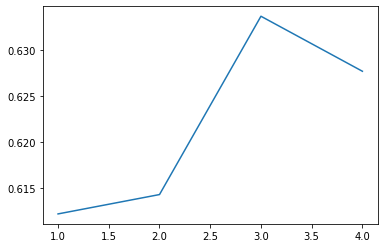

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],microf1[:4])

#sns.lineplot(x=[1,2,3,4],y=microf1[4:8])
#sns.lineplot(x=[1,2,3,4],y=microf1[8:12])
#sns.lineplot(x=[1,2,3,4],y=microf1[12:])
plt.xlabel("q value")
plt.ylabel('micro f1')


In [ ]:
print(microf1.index(max(microf1)))
print(macrof1.index(max(macrof1)))

11
11


In [ ]:
print(
    "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
        X_train.shape, y_train.shape, X_val.shape, y_val.shape
    )
)

Array shapes:
 X_train = (2262, 200)
 y_train = (2262,)
 X_test = (9049, 200)
 y_test = (9049,)


In [ ]:
print(len(node_ids))
print(len(X))
print(len(y))

11311
11311
11311


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
scaler=StandardScaler()
microf1=[]
macrof1=[]
microf1b=[]
macrof1b=[]

for j in range(1):
  # X will hold the 128-dimensional input features
  #X = node_embeddingsa[j]
  # y holds the corresponding target values
  #y = np.array(data2["labels"])
  #for i in range(1,8):
  #  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=i/10)
  #  scaler.fit_transform(X_train)
  #  scaler.fit_transform(X_val)
  #  clf = LogisticRegressionCV(
  #      Cs=20, cv=10,scoring="accuracy", verbose=True, multi_class="multinomial", max_iter=2000
  #  )
  #  clf.fit(X_train, y_train)

  #  y_pred = clf.predict(X_val)


    #print(accuracy_score(y_val, y_pred))
    #print("F1 score (micro)") 
    #print(f1_score(y_val,y_pred,average="micro"))
  #  microf1.append(f1_score(y_val,y_pred,average="micro"))
    #print("F1 score (macro)")
    #print(f1_score(y_val,y_pred,average="macro"))
  #  macrof1.append(f1_score(y_val,y_pred,average="macro"))
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=2/10)
  scaler.fit_transform(X_train)
  scaler.fit_transform(X_val)
  clf = LogisticRegressionCV(Cs=10, cv=5,scoring="accuracy", verbose=True, multi_class="multinomial", max_iter=7000)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_val)

  microf1b.append(f1_score(y_val,y_pred,average="micro"))
  macrof1b.append(f1_score(y_val,y_pred,average="macro"))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
print(microf1b)

[0.22828757611366307]


Text(0.5, 0, 'q')

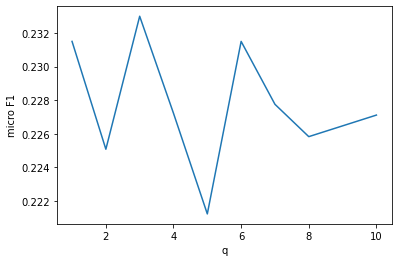

In [ ]:
#plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7],microf1)
plt.plot(range(1,11),microf1b)
plt.ylabel("micro F1")
plt.xlabel("q")

Text(0.5, 0, 'q')

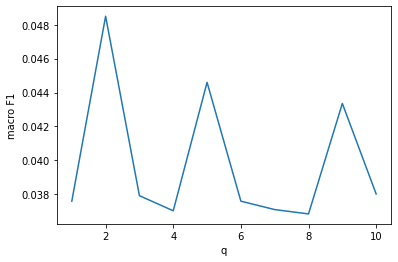

In [ ]:
plt.plot(range(1,11),macrof1b)
plt.ylabel("macro F1")
plt.xlabel("q")

In [ ]:
print(len(node_idsa[11]))
print(len(node_embeddingsa[11]))

11311
11311


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
X=[]
for i in node_idsa[11]:
  X.append(data2["features"][int(i)])
X=np.array(X)
#X=np.array(data2['features'])
#y=np.array(data2['labels'])
y=[]
for i in node_idsa[11]:
  y.append(data2["labels"][int(i)])
y=np.array(y)
print(len(y))
#print(len(X[data2['train_masks'][0]]))

11311


In [ ]:
#print(data2['train_masks'][0])
train_masks=[]
val_masks=[]
for i in node_idsa[11]:
  train_masks.append(data2['train_masks'][0][int(i)])
  val_masks.append(data2['val_masks'][0][int(i)])

##NEURAL NET

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# X_train=X[data2['train_masks'][0]]
# y_train=to_categorical(y[data2['train_masks'][0]])
# print(len(y_train))
# X_test=X[data2['val_masks'][0]]
# y_test=to_categorical(y[data2['val_masks'][0]])
#X_train=X2[data2['train_masks'][0]]
X_train=X[train_masks]
#y_train=to_categorical(y[data2['train_masks'][0]])
y_train=to_categorical(y[train_masks])
#print(len(y_train))
#X_test=X2[data2['val_masks'][0]]
X_test=X[val_masks]
#y_test=to_categorical(y[data2['val_masks'][0]])
y_test=to_categorical(y[val_masks])
# Neural network
model = Sequential()
model.add(Dense(35, input_dim=300, activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(10, activation="softmax"))
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=40, batch_size=64,validation_data=(X_test,y_test))
#model.add(Dense(4, activation=’softmax’))

Epoch 1/40
9/9 [==============================] - 0s 18ms/step - loss: 2.1900 - accuracy: 0.1693 - val_loss: 2.0963 - val_accuracy: 0.2259
Epoch 2/40
9/9 [==============================] - 0s 8ms/step - loss: 2.0981 - accuracy: 0.2139 - val_loss: 2.0824 - val_accuracy: 0.2212
Epoch 3/40
9/9 [==============================] - 0s 8ms/step - loss: 2.0569 - accuracy: 0.2424 - val_loss: 2.0852 - val_accuracy: 0.2341
Epoch 4/40
9/9 [==============================] - 0s 9ms/step - loss: 2.0416 - accuracy: 0.2513 - val_loss: 2.0911 - val_accuracy: 0.2294
Epoch 5/40
9/9 [==============================] - 0s 9ms/step - loss: 2.0160 - accuracy: 0.2549 - val_loss: 2.0931 - val_accuracy: 0.2218
Epoch 6/40
9/9 [==============================] - 0s 8ms/step - loss: 2.0129 - accuracy: 0.2763 - val_loss: 2.0909 - val_accuracy: 0.2341
Epoch 7/40
9/9 [==============================] - 0s 8ms/step - loss: 1.9891 - accuracy: 0.2923 - val_loss: 2.0906 - val_accuracy: 0.2422
Epoch 8/40
9/9 [=================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


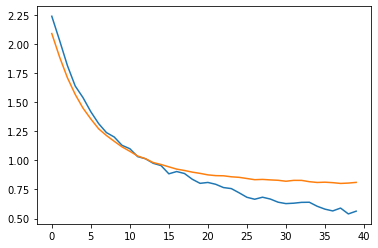

In [ ]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
a = accuracy_score(pred,test)
f1_score_macro = f1_score(test,pred,average='macro')
f1_score_micro = f1_score(test,pred,average='micro')
print('Accuracy is:', a*100)
print('Macro F1 is:' ,f1_score_macro)
print('Micro F1 is:',f1_score_micro)

Accuracy is: 74.78057343475717
Macro F1 is: 0.700123276117193
Micro F1 is: 0.7478057343475717


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
X=[]
for i in node_idsa[0]:
  X.append(data2['features'][int(i)])
X=np.array(X)
X1=np.array(node_embeddingsa[0])
X2=np.hstack((X,X1))
print(len(X2[0]))
#y=np.array(data2['labels'])
print(len(y))
#print(len(X2[data2['train_masks'][0]][0]))

500
11311


In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#X_train=X2[data2['train_masks'][0]]
X_train=X2[train_masks]
#y_train=to_categorical(y[data2['train_masks'][0]])
y_train=to_categorical(y[train_masks])
#print(len(y_train))
#X_test=X2[data2['val_masks'][0]]
X_test=X2[val_masks]
#y_test=to_categorical(y[data2['val_masks'][0]])
y_test=to_categorical(y[val_masks])
# Neural network
model = Sequential()
model.add(Dense(50, input_dim=500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test))
#model.add(Dense(4, activation=’softmax’))

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 2.2228 - accuracy: 0.1729 - val_loss: 2.0680 - val_accuracy: 0.2241
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 2.1116 - accuracy: 0.2157 - val_loss: 2.0645 - val_accuracy: 0.2452
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 2.0749 - accuracy: 0.2389 - val_loss: 2.0666 - val_accuracy: 0.2288
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 2.0655 - accuracy: 0.2228 - val_loss: 2.0632 - val_accuracy: 0.2510
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 2.0501 - accuracy: 0.2460 - val_loss: 2.0623 - val_accuracy: 0.2329
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 2.0022 - accuracy: 0.2638 - val_loss: 2.0632 - val_accuracy: 0.2516
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 2.0308 - accuracy: 0.2585 - val_loss: 2.0673 - val_accuracy: 0.2341
Epoch 8/100
9/9 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


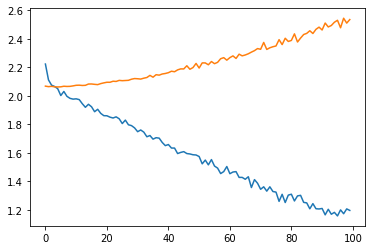

In [ ]:
print(history.history.keys())
#plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
a = accuracy_score(pred,test)
f1_score_macro = f1_score(test,pred,average='macro')
f1_score_micro = f1_score(test,pred,average='micro')
print('Accuracy is:', a*100)
print('Macro F1 is:' ,f1_score_macro)
print('Micro F1 is:',f1_score_micro)

Accuracy is: 79.4031597425395
Macro F1 is: 0.738463466793167
Micro F1 is: 0.794031597425395


In [ ]:
scaler.fit_transform(X_train)
scaler.fit_transform(X_val)
clf = LogisticRegressionCV(
      Cs=20, cv=10,scoring="accuracy", verbose=True, multi_class="multinomial", max_iter=3000
  )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)


print(accuracy_score(y_val, y_pred))
print("F1 score (micro)") 
  #print(f1_score(y_val,y_pred,average="micro"))
#  microf1.append(f1_score(y_val,y_pred,average="micro"))
print("F1 score (macro)")
print(f1_score(y_val,y_pred,average="macro"))
#  macrof1.append(f1_score(y_val,y_pred,average="macro"))

ValueError: ignored

In [ ]:
y_pred = clf.predict(X_val)
print(len(X_train))

8190


In [ ]:
from sklearn.metrics import f1_score
print(accuracy_score(y_val, y_pred))
print("F1 score (micro)") 
print(f1_score(y_val,y_pred,average="micro"))
print("F1 score (macro)")
print(f1_score(y_val,y_pred,average="macro"))

0.20859242509892595
F1 score (micro)
0.20859242509892595
F1 score (macro)
0.06110406487688528


In [ ]:
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD

Y_train = to_categorical(y_train)
Y_test  = to_categorical(y_val)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (100,)))
model.add(layers.Dense(10, activation='softmax'))
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd,
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(X_train,
                   Y_train,
                   epochs=500,verbose=1)

Epoch 1/500
19/19 [==============================] - 0s 2ms/step - loss: 2.2388 - accuracy: 0.2224
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1500 - accuracy: 0.2293
Epoch 3/500
19/19 [==============================] - 0s 2ms/step - loss: 2.1138 - accuracy: 0.2293
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0994 - accuracy: 0.2293
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0936 - accuracy: 0.2293
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0905 - accuracy: 0.2293
Epoch 7/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0884 - accuracy: 0.2293
Epoch 8/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0877 - accuracy: 0.2224
Epoch 9/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0868 - accuracy: 0.2293
Epoch 10/500
19/19 [==============================] - 0s 2ms/step - loss: 2.0849 - accuracy: 0.2293
Epoch 11/

In [ ]:
y_pred=model.predict_classes(X_val)
#print(max(y_pred))
print(f1_score(y_val,y_pred,average="micro"))

0.20859242509892595


In [ ]:
from torch_geometric.utils import to_networkx
print(len(data["x"][0]))
mytensor=data["x"]
print(data.x)
new_graph=to_networkx(data,node_attrs=data2["features"],to_undirected=False)

300
tensor([[-0.0204,  0.0646,  0.0197,  ..., -0.0754, -0.1124,  0.1514],
        [-0.0438, -0.0317, -0.0082,  ..., -0.0658,  0.0643, -0.0588],
        [-0.1127,  0.0098,  0.1422,  ...,  0.1398, -0.0195,  0.0451],
        ...,
        [ 0.0368,  0.0305, -0.0285,  ..., -0.0600, -0.0721,  0.1510],
        [-0.0329,  0.0195, -0.1278,  ..., -0.1751, -0.0754,  0.1974],
        [ 0.0530,  0.0480, -0.0100,  ...,  0.0250, -0.0308,  0.0691]])


TypeError: ignored

In [ ]:
print(mygraph.info())

StellarDiGraph: Directed multigraph
 Nodes: 11701, Edges: 291039

 Node types:
  default: [11701]
    Features: float32 vector, length 300
    Edge types: default-default->default

 Edge types:
    default-default->default: [291039]
        Weights: all 1 (default)
        Features: none


In [ ]:
mygraph=nx.DiGraph()

In [ ]:
for i in range(len(data2["features"])):
  mygraph.add_node(i,features=data2["features"][i])

In [ ]:
count=0
for i in range(len(data2["links"])):
  edge_list=data2["links"][i]
  for j in edge_list:
    mygraph.add_edge(i,j)

In [ ]:
print(len(mygraph.edges()))

291039


In [ ]:
mygraph=StellarGraph.from_networkx(mygraph,node_features="features")

In [ ]:
print(data2.keys())

dict_keys(['features', 'labels', 'links', 'train_masks', 'stopping_masks', 'val_masks', 'test_mask'])


In [ ]:
print(len(data2["labels"]))

11701
